In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [6]:
msg = pd.read_csv("smsSpam",sep="\t",names=['Output','Messages'])

In [7]:
msg.head(10)

,Output,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
# Preprocessing -> Removing stopwords numbers symbols 
lm = WordNetLemmatizer()
all_msg = []
for i in range(len(msg)):
    data = re.sub("^a-zA-Z"," ",msg['Messages'][i]).lower().split()
    data = [lm.lemmatize(word)  for word in data if word not in stopwords.words('english')]
    data = ' '.join(data)
    all_msg.append(data)
    

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vec = TfidfVectorizer()
X = vec.fit_transform(all_msg).toarray()

In [23]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
y = msg['Output']

In [30]:
y = pd.get_dummies(y)['ham'].values

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
trainX,testX,trainY,testY = train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
model = MultinomialNB()
model.fit(trainX,trainY)

MultinomialNB()

In [37]:
pred = model.predict(testX)

In [38]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [40]:
testY

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
import seaborn as sns

In [46]:
testY.shape

(1115,)

In [51]:
confusion_matrix(testY,pred)

array([[118,  29],
       [  0, 968]], dtype=int64)

<AxesSubplot:>

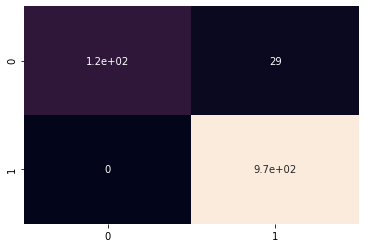

In [50]:
sns.heatmap(confusion_matrix(testY,pred),cbar=False, annot=True)